In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path
from DataLoader_NN import MyDataloader
from Engine_NN import Engine
from reformat_data import *
import pandas as pd
import matplotlib.pyplot as plt
import torch
import Architecture_NN as Architecture
import Information as info

In [3]:
data_people = people_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/People.xlsx")
data_family = family_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/Family.xlsx")
data_trips = trips_reformat(r"/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/data/Shiraze94_fa/Trips.xlsx")

In [42]:
train_percent = 0.7
val_percent = 0.15
test_percent = 0.15
batch_size = 312
seed = 1

dataloader = MyDataloader(data_list=[data_people, data_family, data_trips],
                          batch_size=batch_size,
                          train_percent=train_percent,
                          val_percent=val_percent,
                          test_percent=test_percent,
                          random_seed=seed)
train, val, test = dataloader.fit()

try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))

211 46 46


/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/DataLoader.py:187: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.61473088 0.90084986 0.26345609 ... 0.81303116 0.52974504 0.17280453]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.scaler_x = MinMaxScaler(feature_range=(0, 1))
/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/DataLoader.py:187: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.02832861 0.04815864 0.00283286 ... 0.04249292 0.01983003 0.00283286]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.scaler_x = MinMaxScaler(feature_range=(0, 1))
/mnt/Data1/Python_Projects/Pure-Python/P5/01-Thesis/DataLoader.py:187: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8260

In [43]:
dataloader.data

,destination_area_code,origin_area_code,origin_region_code,start_hour,start_minute,hourly_correction_factor,trip_distance,previous_trip_code,gender,age,working,driving_license,education_level,family_members_count,total_vehicles_count,bicycles_24inch_or_larger_count,motorcycles_count,private_cars_count,pickup_trucks_count,taxis_count,other_vehicles_count,home_area_code,home_region_code,correction_factor,expansion_factor,trip_purpose_0,trip_purpose_1,trip_purpose_2,trip_purpose_3,trip_purpose_4,trip_purpose_5,trip_purpose_6,trip_purpose_7,trip_purpose_8,trip_purpose_9,trip_purpose_10,travel_mode_0.0,travel_mode_1.0,travel_mode_2.0,travel_mode_3.0,travel_mode_4.0,travel_mode_5.0,travel_mode_6.0,travel_mode_7.0,travel_mode_8.0,travel_mode_9.0,travel_mode_10.0,travel_mode_11.0,travel_mode_12.0,travel_mode_13.0,travel_mode_14.0,travel_mode_15.0,travel_mode_16.0,travel_mode_17.0,home_based_0,home_based_1,home_based_2,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,job_12,job_13,job_14
0,127,252,14,10,15,1.7,8499.15,0,1,44,1,1.0,0,6,0,0,0,0,0,0,0,252,14,0.66181,29.56596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,251,128,7,14,30,1.7,7693.01,120670,1,44,1,1.0,0,6,0,0,0,0,0,0,0,252,14,0.66181,29.56596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,169,171,14,7,30,1.0,2421.68,0,1,47,1,0.0,4,5,1,1,0,0,0,0,0,171,14,0.76409,34.47413,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,170,170,14,8,35,1.0,1677.50,100368,1,47,1,0.0,4,5,1,1,0,0,0,0,0,171,14,0.76409,34.47413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,171,14,12,37,1.0,7807.36,100370,1,47,1,0.0,4,5,1,1,0,0,0,0,0,171,14,0.76409,34.47413,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93936,26,30,1,18,30,1.0,1141.41,107678,1,21,0,1.0,6,1,1,1,0,0,0,0,0,27,1,1.00000,6.50000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93937,29,27,1,9,30,1.0,1268.87,0,1,21,0,0.0,6,1,1,1,0,0,0,0,0,27,1,1.00000,6.50000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93938,26,30,1,14,0,1.0,1141.41,107672,1,21,0,0.0,6,1,1,1,0,0,0,0,0,27,1,1.00000,6.50000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
93939,29,27,1,17,20,1.0,1268.87,107673,1,21,0,0.0,6,1,1,1,0,0,0,0,0,27,1,1.00000,6.50000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
features_n = len(info.features_dataloader)
target_n = 354
hidden_n = 128
torch.manual_seed(seed)
model = Architecture.NN(features_n=features_n, output_n=target_n, hidden_n=hidden_n)

EPOCHS = 300
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.001

optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

engine = Engine(model=model, 
                train_dataloader=train,
                val_dataloader=val,
                test_dataloader=test,
                random_seed=42)
model0_results = engine.train(loss_fn=loss_fn,
                              optimizer=optimizer,
                              epochs_num=EPOCHS,
                              resolution=1)


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1 | train: Loss 5.385165 Accuracy 0.0370 | validation: Loss 5.007951 Accuracy 0.0590
Epoch 2 | train: Loss 4.797741 Accuracy 0.0733 | validation: Loss 4.608363 Accuracy 0.0856
Epoch 3 | train: Loss 4.421043 Accuracy 0.1042 | validation: Loss 4.250516 Accuracy 0.1273
Epoch 4 | train: Loss 4.075084 Accuracy 0.1496 | validation: Loss 3.930141 Accuracy 0.1669
Epoch 5 | train: Loss 3.775783 Accuracy 0.1967 | validation: Loss 3.673994 Accuracy 0.2044
Epoch 6 | train: Loss 3.549948 Accuracy 0.2350 | validation: Loss 3.495558 Accuracy 0.2433
Epoch 7 | train: Loss 3.390529 Accuracy 0.2635 | validation: Loss 3.365467 Accuracy 0.2694
Epoch 8 | train: Loss 3.269818 Accuracy 0.2863 | validation: Loss 3.265371 Accuracy 0.2894
Epoch 9 | train: Loss 3.173586 Accuracy 0.3063 | validation: Loss 3.184697 Accuracy 0.3076
Epoch 10 | train: Loss 3.092774 Accuracy 0.3242 | validation: Loss 3.116963 Accuracy 0.3249
Epoch 11 | train: Loss 3.022915 Accuracy 0.3409 | validation: Loss 3.058381 Accuracy 0.33

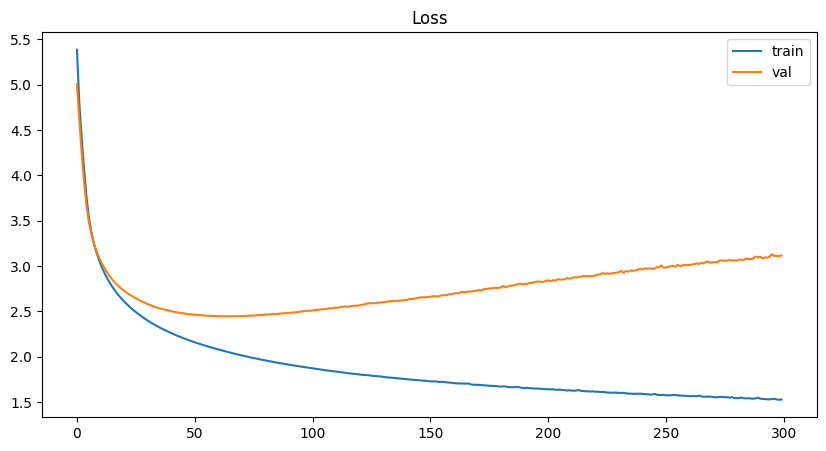

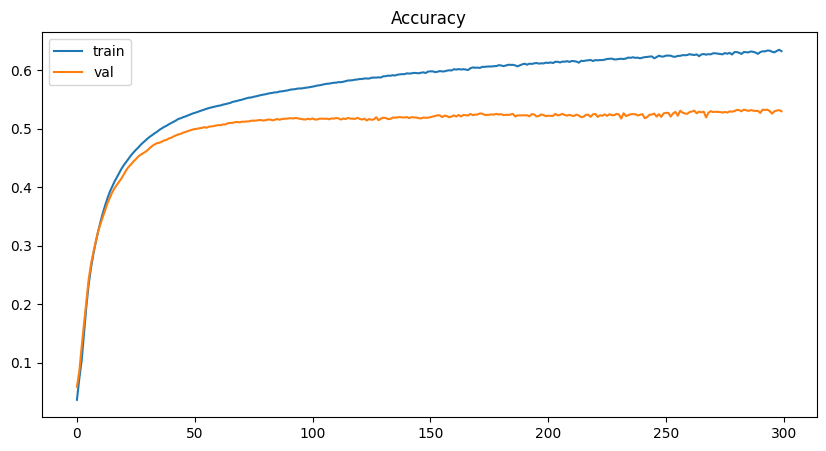

In [46]:
engine.plot_loss()
engine.plot_acc()

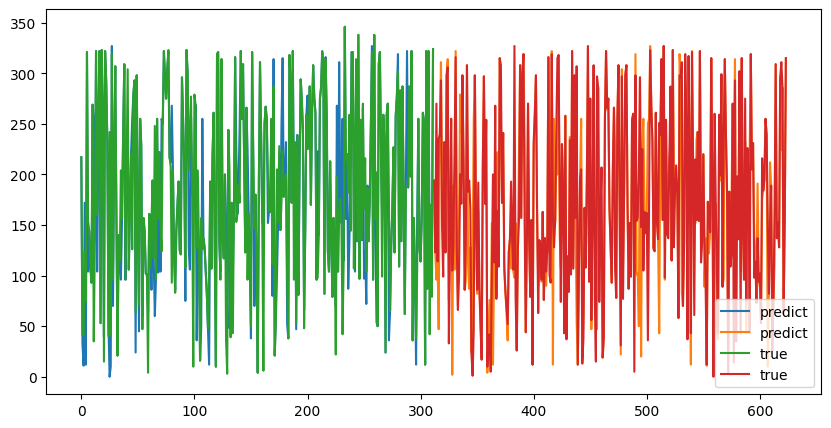

In [47]:
engine.plot_predict_real()

In [48]:
test_result = engine.test(loss_fn=loss_fn)

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.
Loss : 2.7624902466069097 and Accuracy : 0.5318709423568759


In [ ]:
features1 = {"origin_area_code":[range(1, 254)]}
features2 = {"origin_region_code": sorted(list(dataloader.data["Age"].unique()))}
features3 = {"Sex": [0, 1]}
features4 = {"SibSp":[0, 1, 2, 3, 4, 5, 6, 7, 8]}
features5 = {"Fare": sorted(list(dataloader.data["Fare"].unique()))}
features6 = {"Parch": [0, 1, 2, 3, 4, 5, 6]}

pdp_dataloader = dataloader.partial_dependence_plot_data(features=features3)
engine.partial_dependence_plot(pdp_data=pdp_dataloader)

In [ ]:
ice_dataloader = dataloader.individual_conditional_expectation_data(features=features2)
engine.individual_conditional_expectation(ice_data=dataloader.ice_data)

In [ ]:
features = ["Pclass", "Age", "Sex", "SibSp", "Fare"]
ale_dataloader = dataloader.accumulated_local_effects_data(feature=features[2], n=3)
engine.accumulated_local_effects_plot(ale_dataloader)

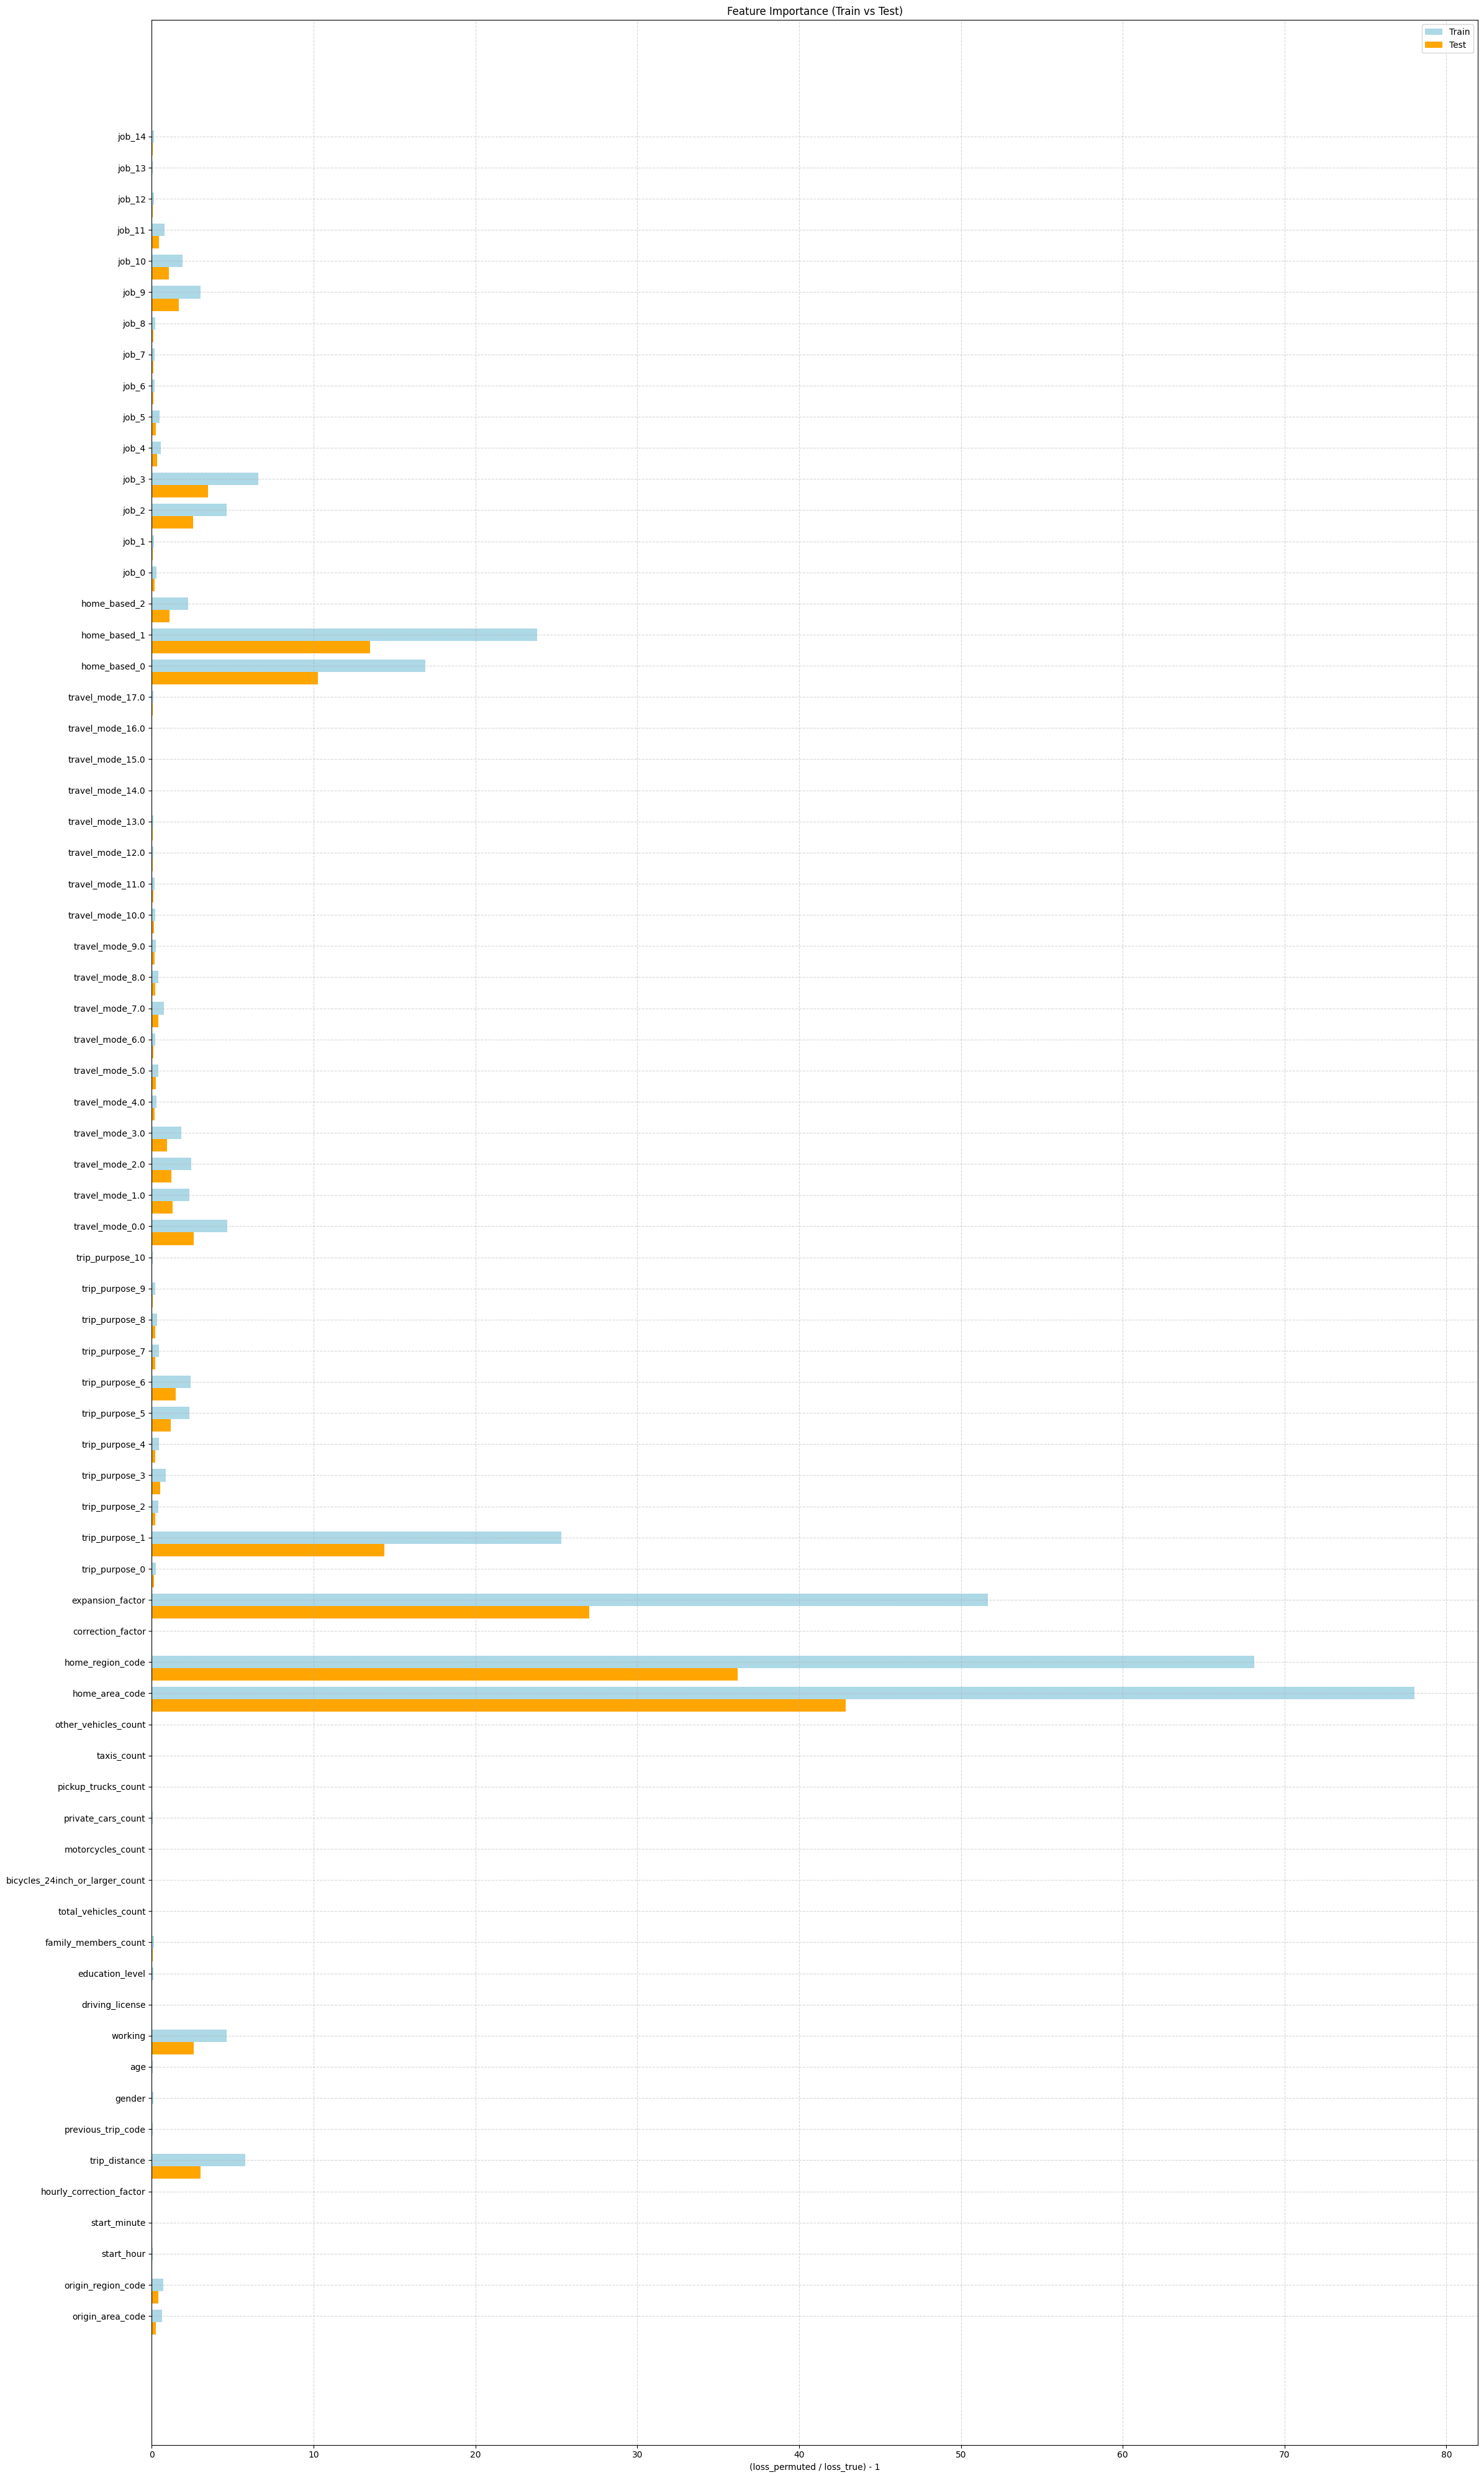

In [56]:
feature_importance_dataloader = dataloader.feature_importance_data(seed=42)
feature_loss = engine.feature_importance_plot(feature_importance_dataloader, loss_fn=loss_fn, fig_size=(24, 40))
